In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/unique_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/unique_data.csv'

In [ ]:
display(data[:4])

,Node ID,Latitude,Longitude,RSSI 1,RSSI 2,RSSI 3,SNR 1,SNR 2,SNR 3,TDoA 1,TDoA 2,TDoA 3
0,1,30.095533,-95.990582,-67,-53,-62,12,16,26,0.402285,0.063060,0.774908
1,2,30.090537,-95.992485,-63,-62,-70,24,22,29,0.020667,0.321181,0.017177
2,3,30.102261,-95.986619,-55,-68,-52,12,20,17,0.864311,0.488032,0.704004
3,4,30.087665,-95.993680,-52,-59,-54,14,10,18,0.423811,0.844232,0.760452


In [ ]:
latlogh =data[['Latitude',	'Longitude']]
display(latlogh.sort_values('Latitude').drop_duplicates())

,Latitude,Longitude
49888,30.082185,-95.995767
17500,30.082192,-95.995764
50428,30.082203,-95.995759
28630,30.082209,-95.995751
32189,30.082241,-95.995743
...,...,...
52543,30.103862,-95.985680
13653,30.103938,-95.985637
2743,30.103940,-95.985632
8034,30.103945,-95.985628


In [ ]:
X = data.drop(columns=['Latitude', 'Longitude']).to_numpy()
y = data[['Latitude','Longitude']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
print(X.shape, y.shape, X_train.shape,X_test.shape)

(60000, 10) (60000, 2) (42000, 10) (18000, 10)


**Linear Regression for Multioutput Regression**

The example below fits a linear regression model on the multioutput regression dataset, then makes a single prediction with the fit model.

In [ ]:
# linear regression for multioutput regression
from sklearn.linear_model import LinearRegression
# define model
model_lr = MultiOutputRegressor(LinearRegression())
# fit model
model_lr.fit(X_train, y_train)
# make a prediction
y_pred_lr = model_lr.predict(X_test)
# summarize prediction
print(y_pred_lr[0])
# Calculate the score
score_lt = model_lr.score(X_test, y_pred_lr)
# Print the score
print(score_lt)

print('Latitude MSE  :',mean_squared_error(y_test[:,0], y_pred_lr[:,0]))
print('Longitude MSE :',mean_squared_error(y_test[:,1], y_pred_lr[:,1]))

[ 30.0940055  -95.99064251]
1.0
Latitude MSE  : 2.0551575094274933e-05
Longitude MSE : 4.381852021411273e-06


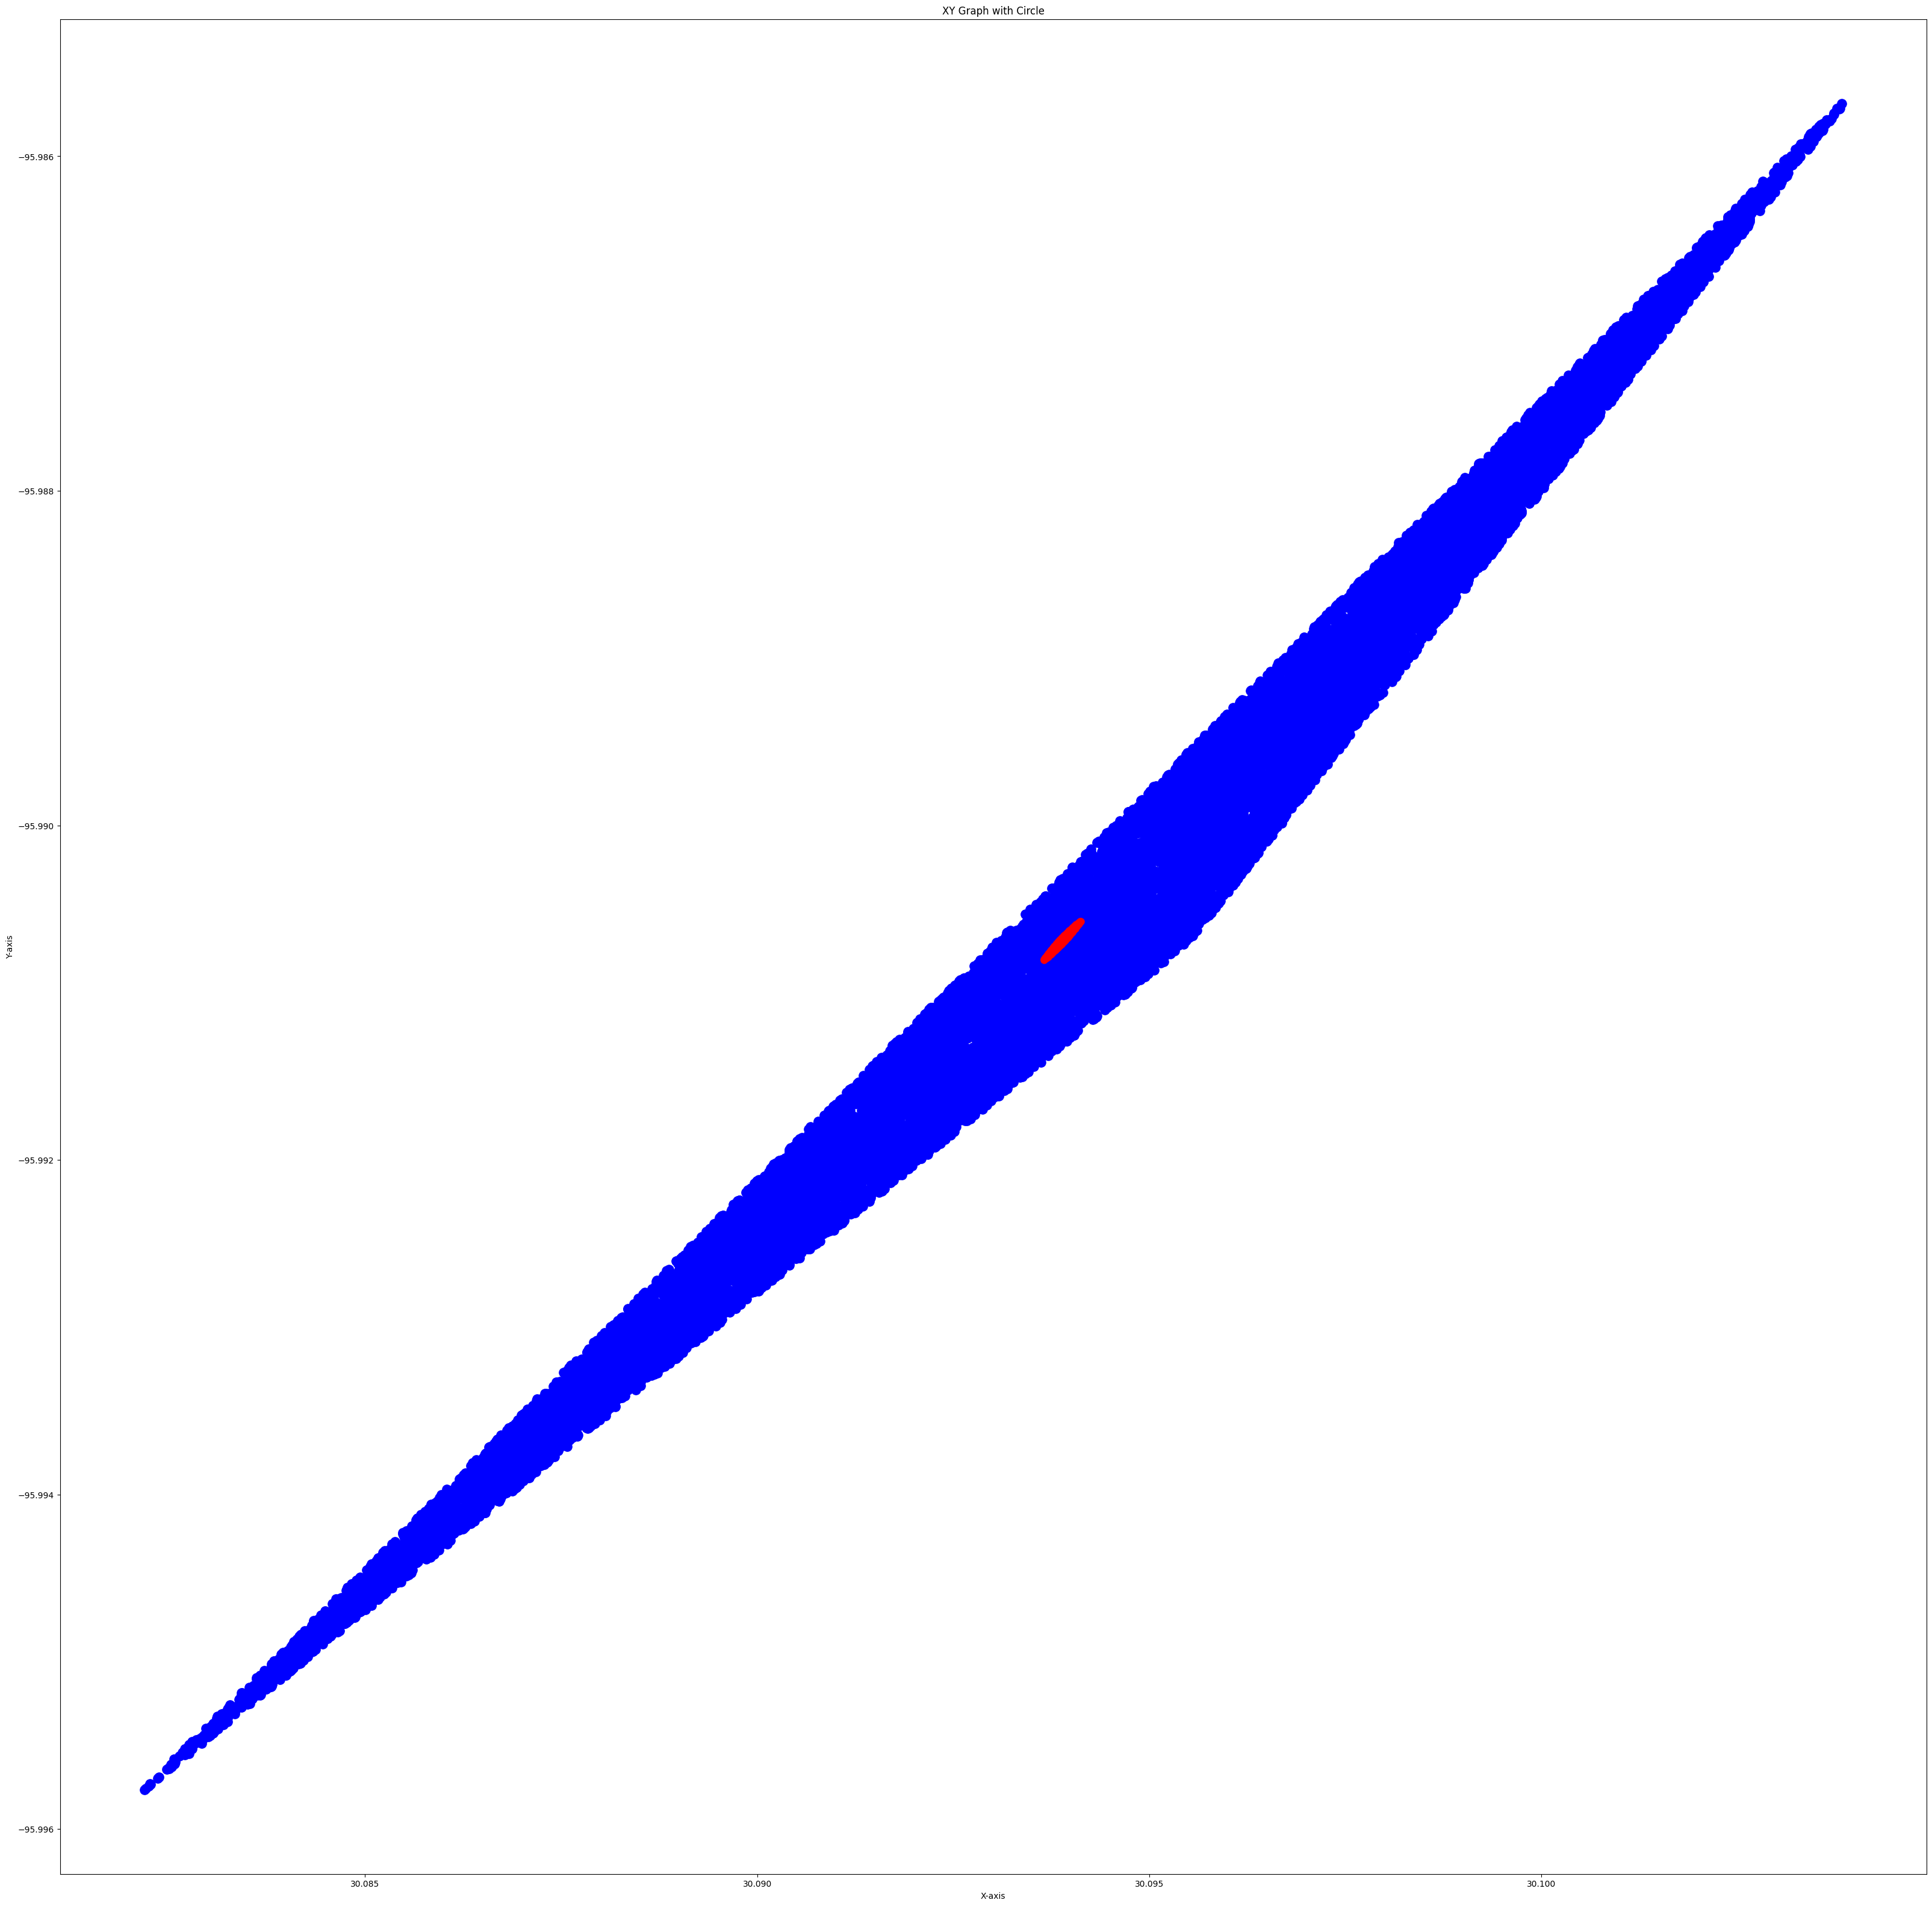

In [ ]:
import matplotlib.pyplot as plt
# Create a scatter plot
def plotcomp(y_test,y_pred):
    plt.rcParams["figure.figsize"] = (40,40)
    #plt.scatter(y_test[:,0],y_test[:,1], color='blue')
    #plt.scatter(y_pred_lt[:,0], y_pred_lt[:,1], color='red')
    plt.plot(y_test[:,0],y_test[:,1],'o', color='blue', markersize=11)
    plt.plot(y_pred[:,0], y_pred[:,1],'o', color='red', markersize=8)
    # Add a circle
    #circle = plt.Circle((0, 0), radius=0.5, color='black')
    #plt.add_patch(circle)

    # Set the title and labels
    plt.title('XY Graph with Circle')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Show the plot
    plt.show()

plotcomp(y_test,y_pred_lr)

[ 30.09275601 -95.99068628]
1.0
Latitude MSE  : 2.1041296112834116e-05
Longitude MSE : 4.4756011848517095e-06


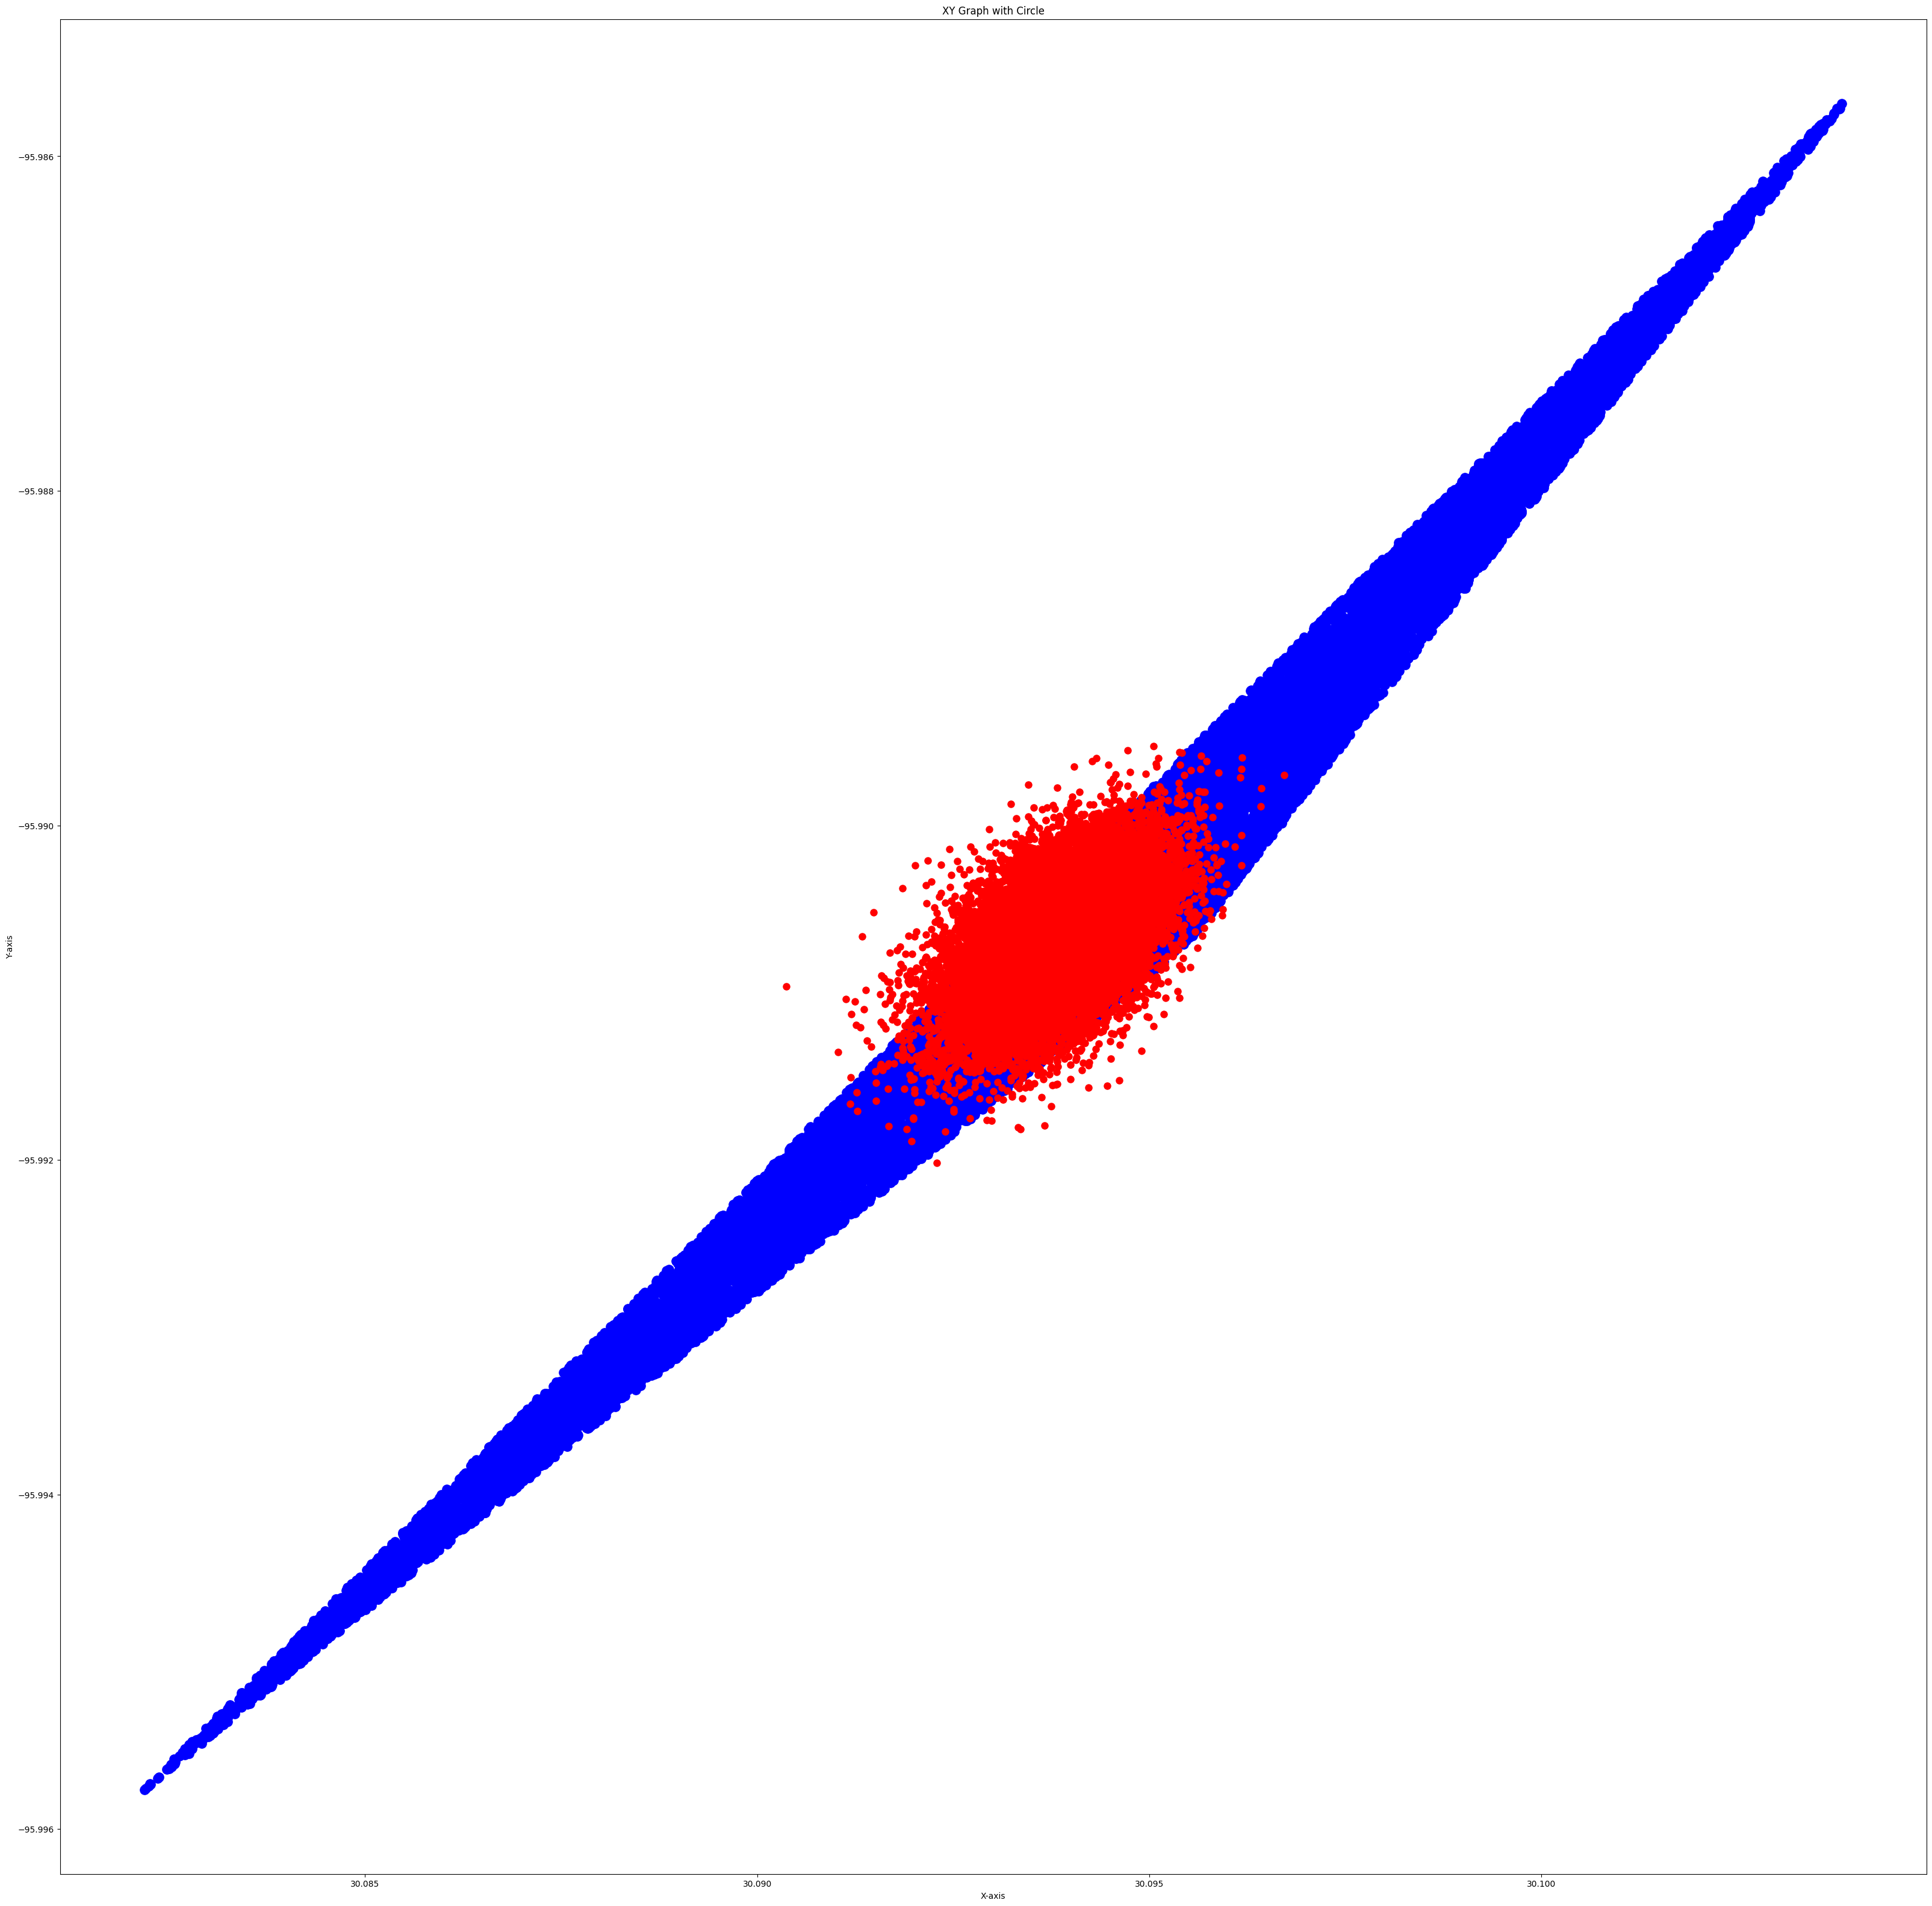

In [ ]:
# linear regression for multioutput regression
from sklearn.ensemble import RandomForestRegressor

# define model
model_rf = MultiOutputRegressor(RandomForestRegressor())
# fit model
model_rf.fit(X_train, y_train)
# make a prediction
y_pred = model_rf.predict(X_test)
# summarize prediction
print(y_pred[0])
# Calculate the score
score = model_rf.score(X_test, y_pred)

# Print the score
print(score)
print('Latitude MSE  :',mean_squared_error(y_test[:,0], y_pred[:,0]))
print('Longitude MSE :',mean_squared_error(y_test[:,1], y_pred[:,1]))
plotcomp(y_test,y_pred)

**k-Nearest Neighbors for Multioutput Regression**

The example below fits a k-nearest neighbors model on the multioutput regression dataset, then makes a single prediction with the fit model.

[ 30.09180144 -95.99160434]
1.0
Latitude MSE  : 2.449657149751186e-05
Longitude MSE : 5.220506271082771e-06


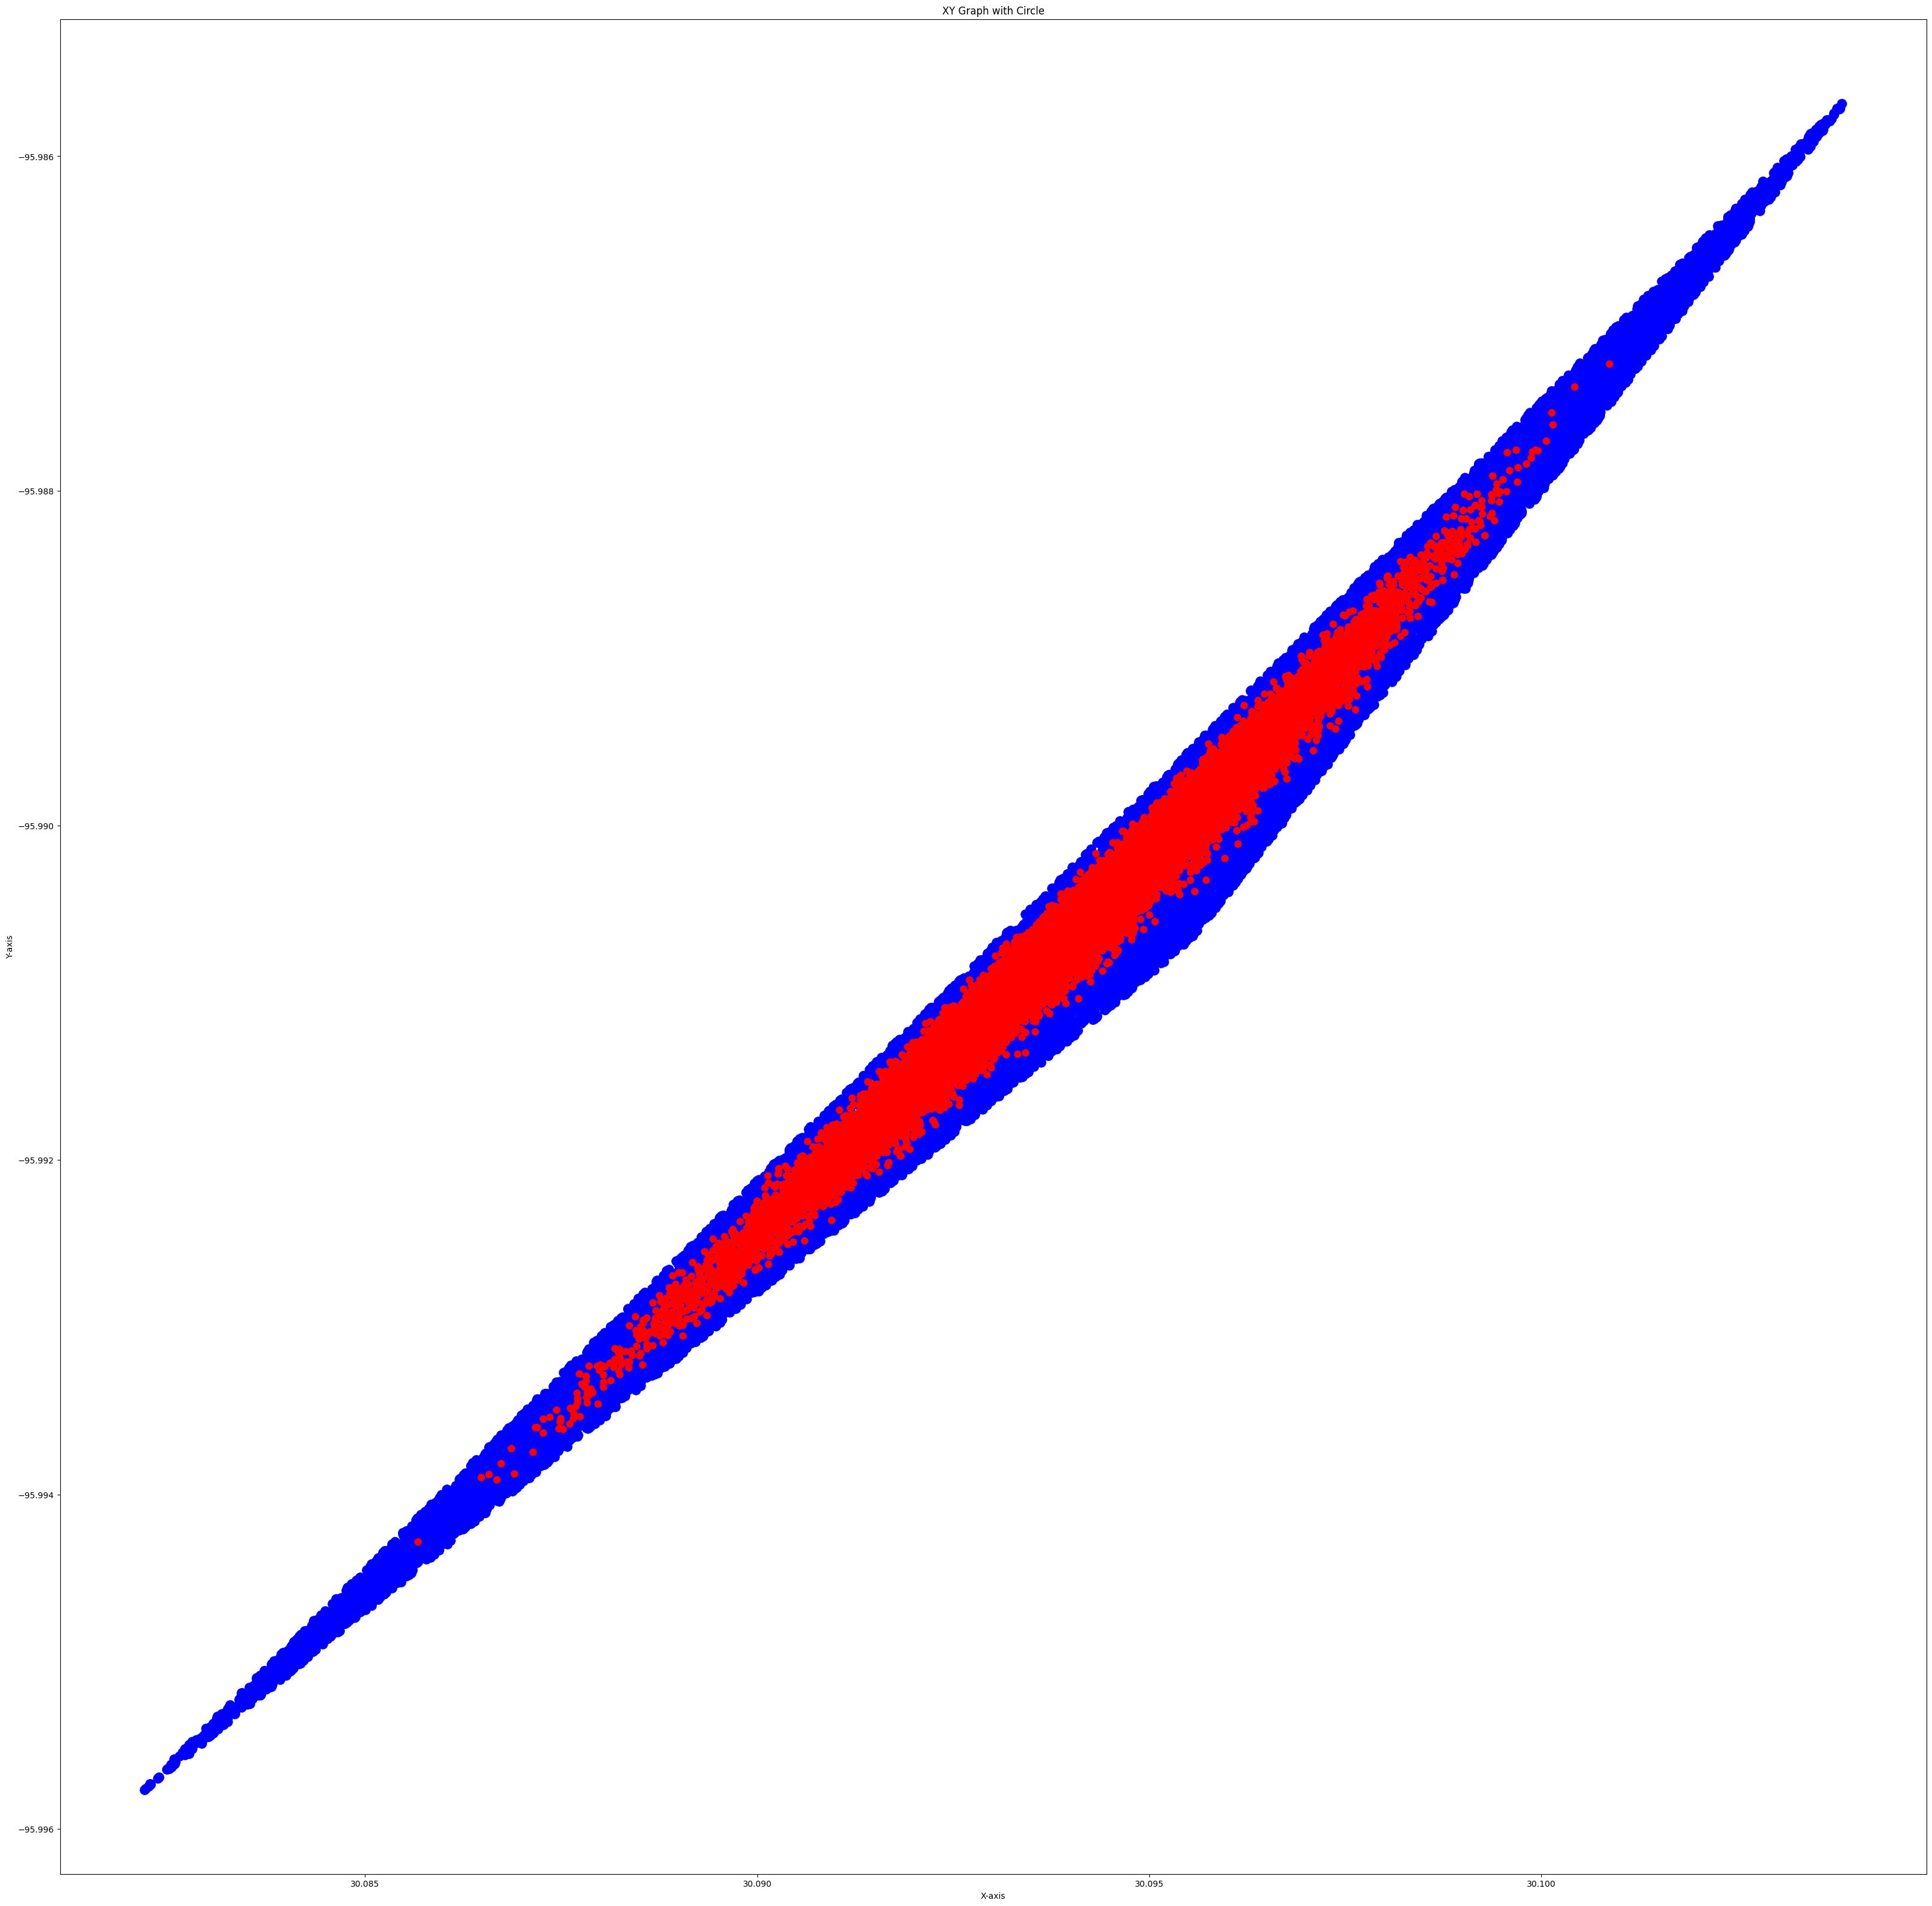

In [ ]:
# k-nearest neighbors for multioutput regression
from sklearn.neighbors import KNeighborsRegressor
# define model
model_kn = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
# fit model
model_kn.fit(X_train, y_train)
# make a prediction
y_pred = model_kn.predict(X_test)
# summarize prediction
print(y_pred[0])
# Calculate the score
score = model_kn.score(X_test, y_pred)

# Print the score
print(score)
print('Latitude MSE  :',mean_squared_error(y_test[:,0], y_pred[:,0]))
print('Longitude MSE :',mean_squared_error(y_test[:,1], y_pred[:,1]))
plotcomp(y_test,y_pred)

**Decision Tree for Multioutput Regression**

The example below fits a decision tree model on the multioutput regression dataset, then makes a single prediction with the fit model.

[ 30.09116752 -95.99206365]
1.0


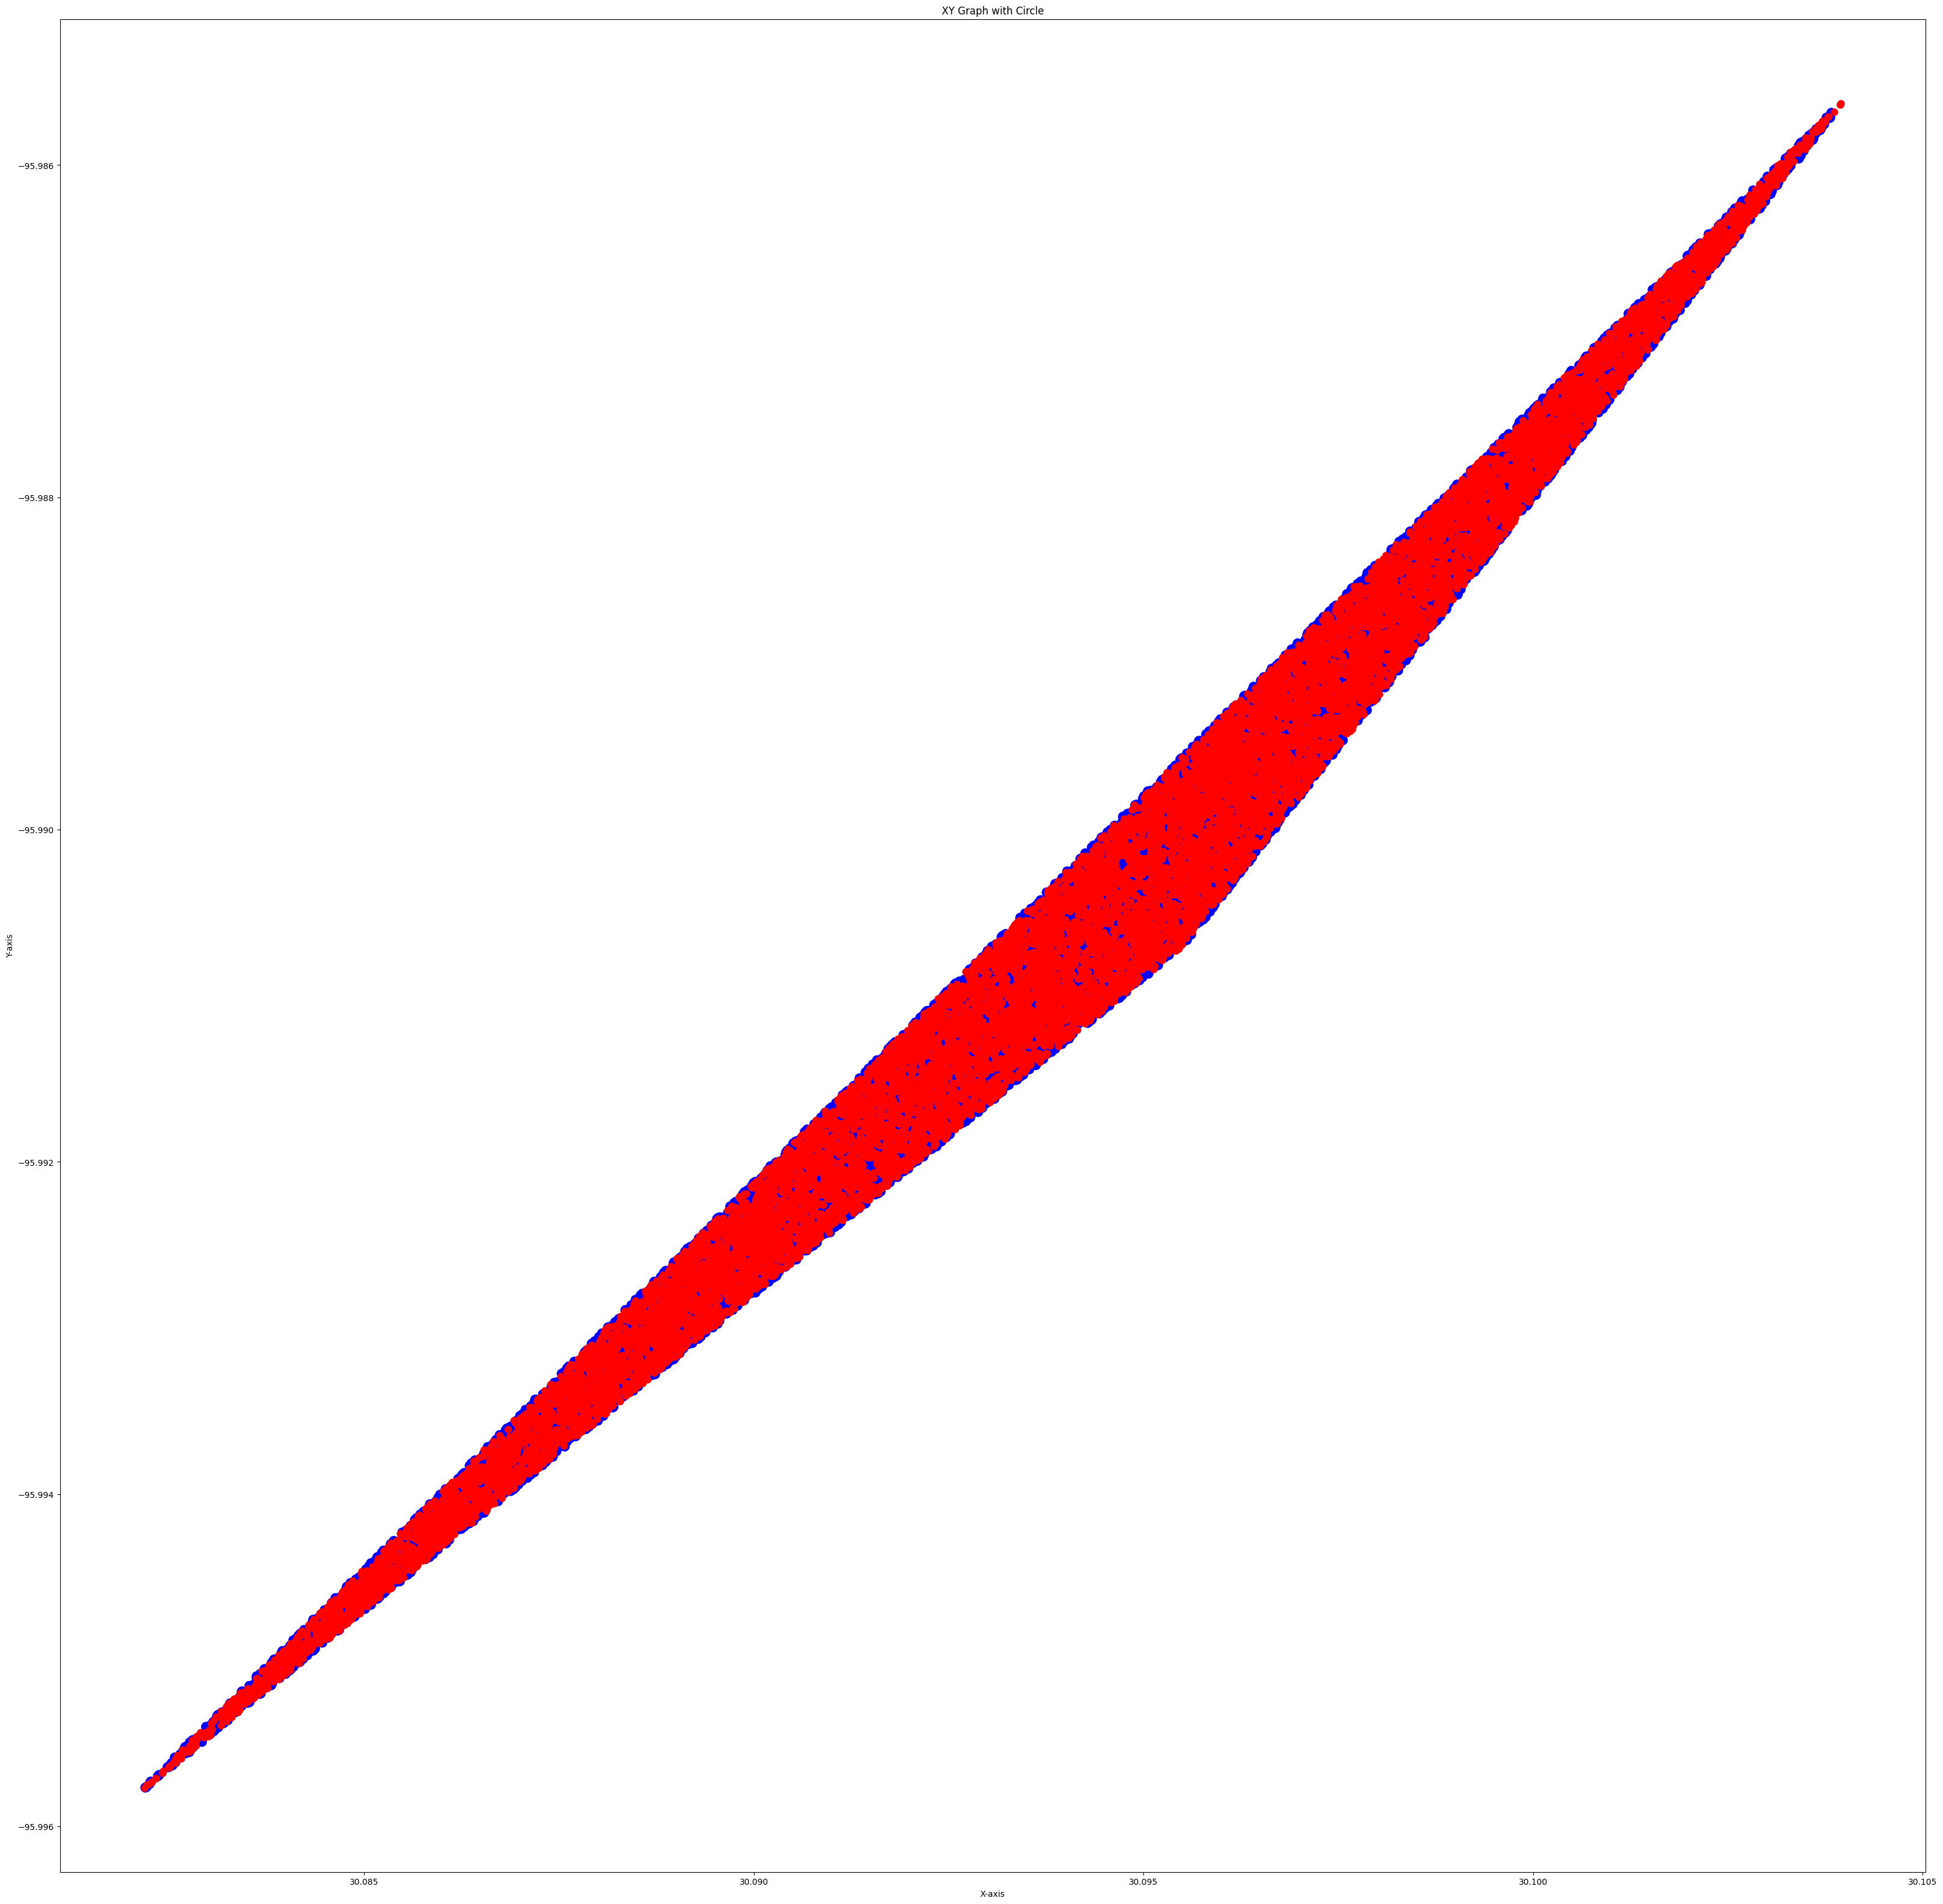

In [ ]:
# decision tree for multioutput regression
from sklearn.tree import DecisionTreeRegressor
# define model
model_dt = DecisionTreeRegressor()
# fit model
model_dt.fit(X_train, y_train)
# make a prediction
y_pred = model_dt.predict(X_test)
# summarize prediction
print(y_pred[0])
# Calculate the score
score = model_dt.score(X_test, y_pred)

# Print the score
print(score)

plotcomp(y_test,y_pred)

In [ ]:
print('Latitude MSE  :',mean_squared_error(y_test[:,0], y_pred[:,0]))
print('Longitude MSE :',mean_squared_error(y_test[:,1], y_pred[:,1]))

Latitude MSE  : 4.2961226388696456e-05
Longitude MSE : 9.182650294441283e-06


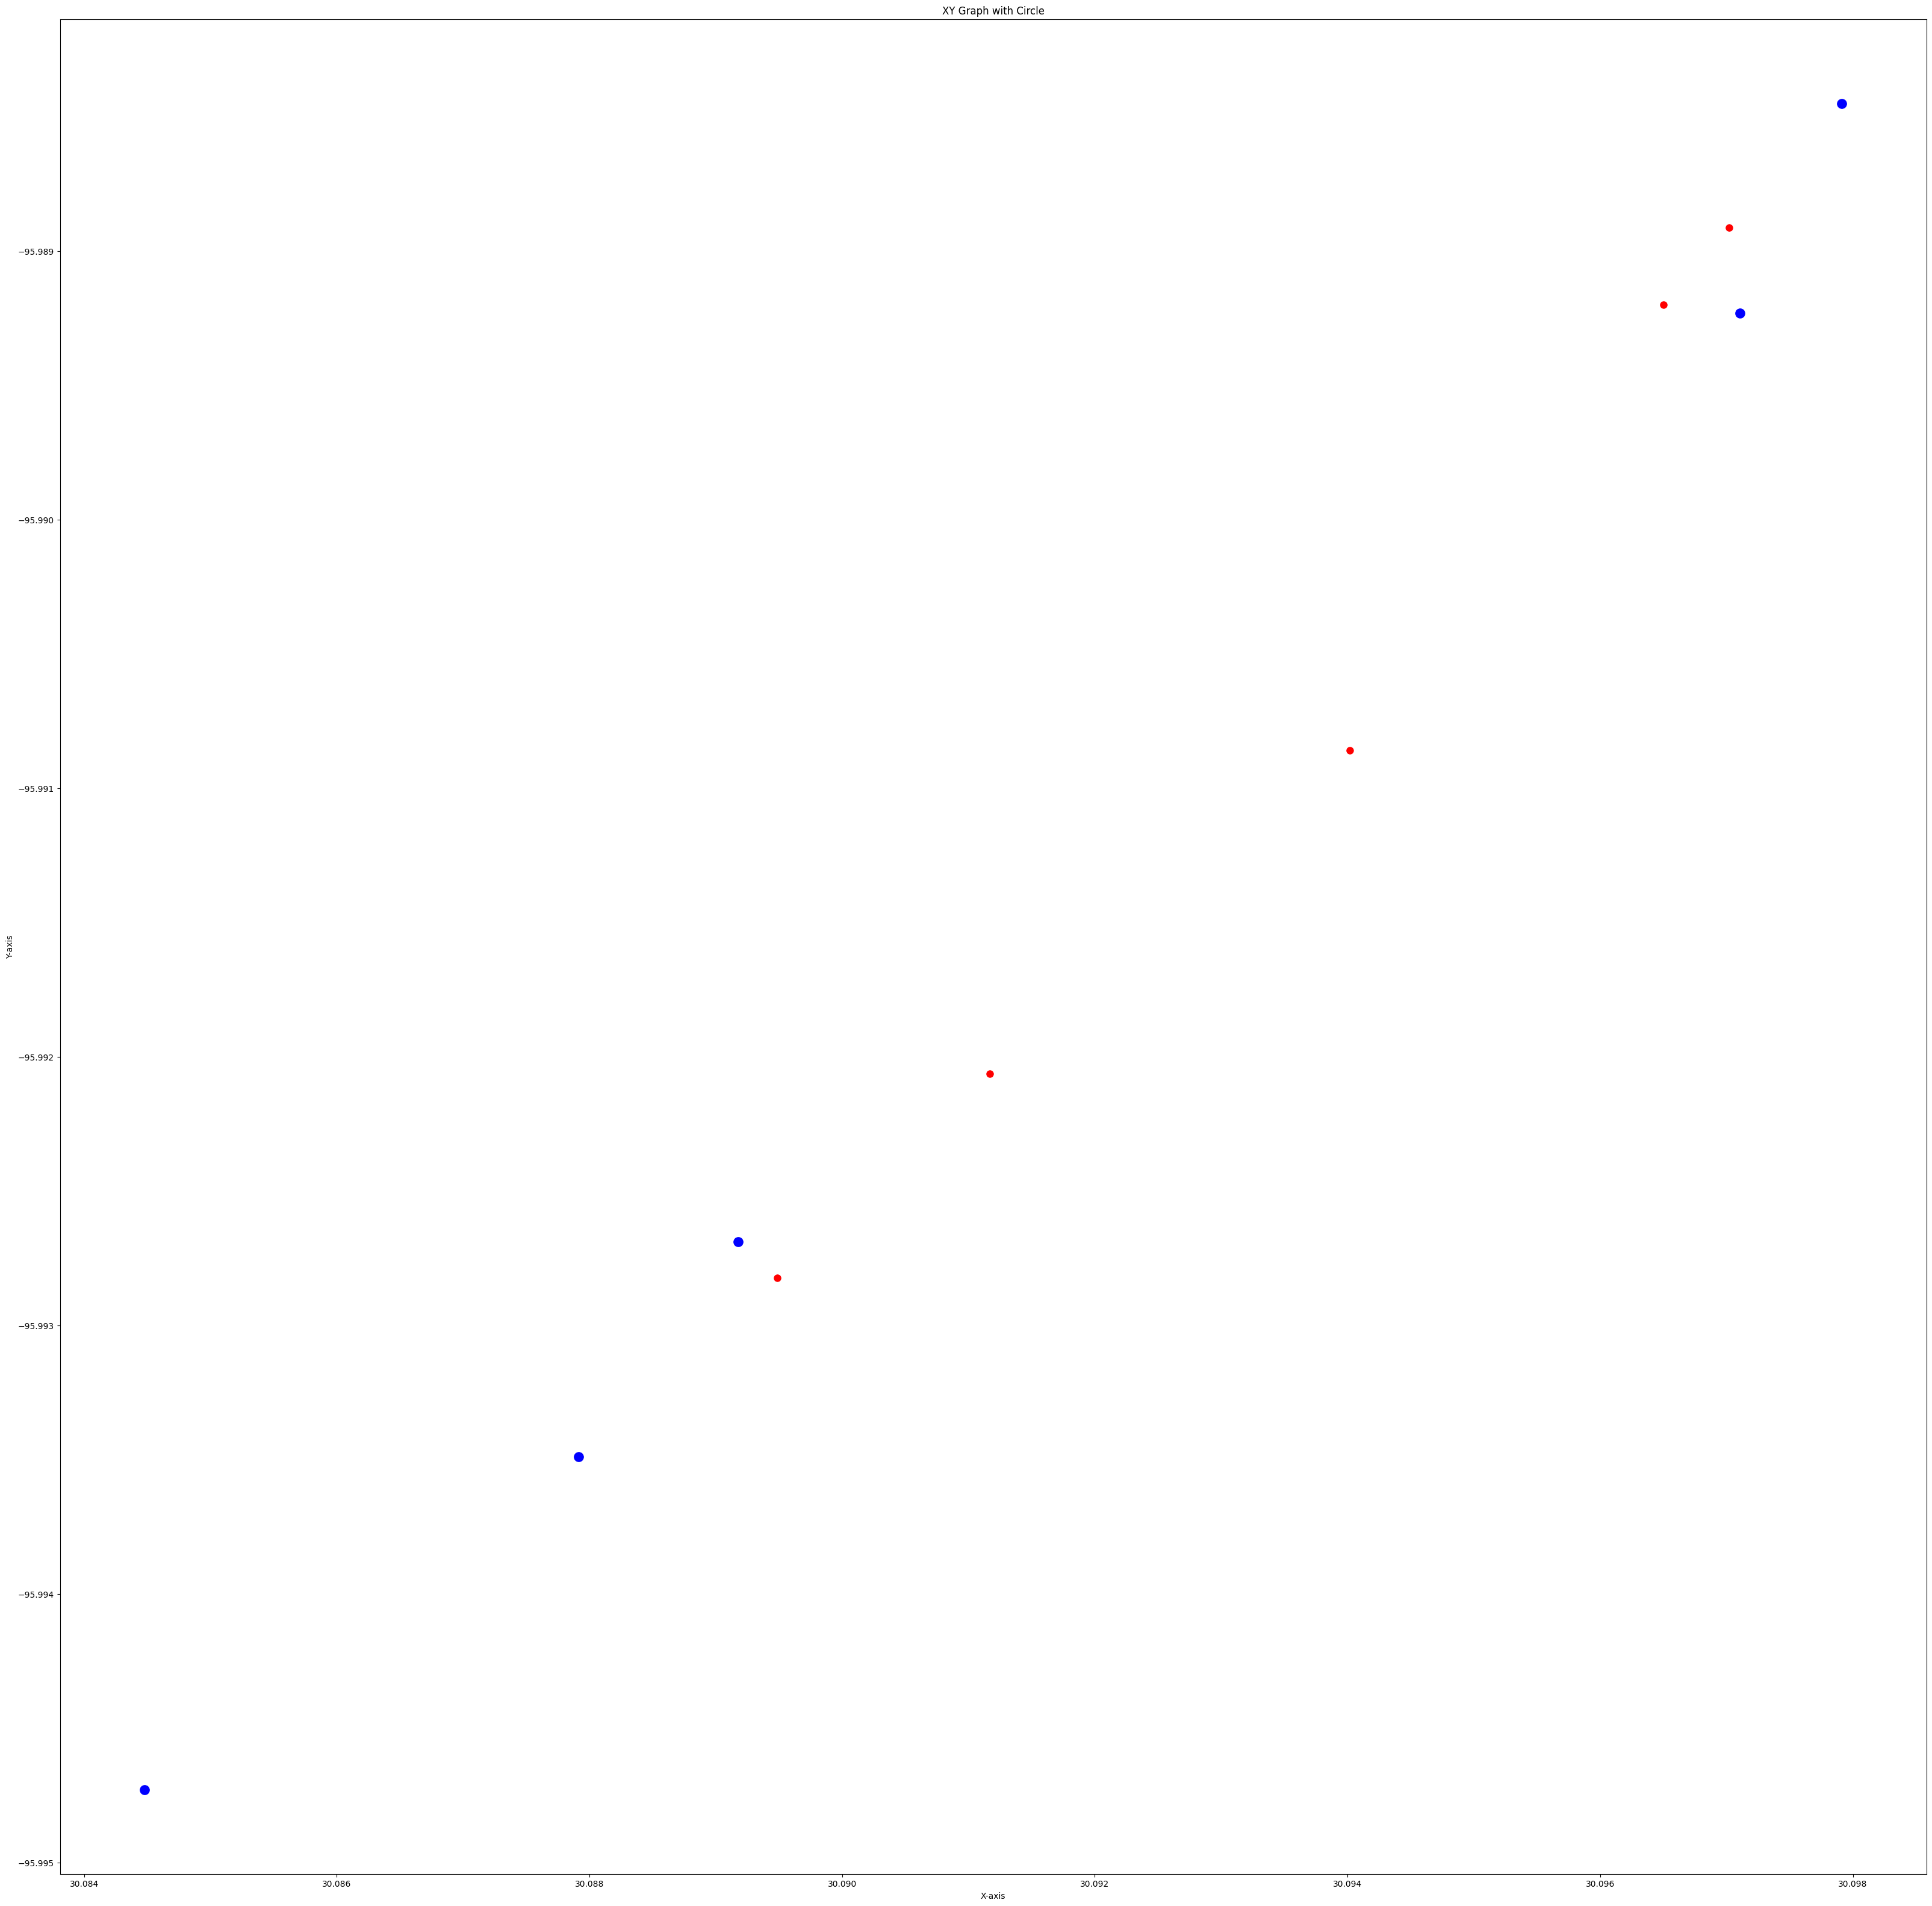

In [ ]:
plotcomp(y_test[:5],y_pred[:5])

In [ ]:
print(np.stack((y_test[:,0], y_pred[:,0]),axis=1))

[[30.08447957 30.09116752]
 [30.09790999 30.09649902]
 [30.09710768 30.09401836]
 ...
 [30.09306552 30.09689355]
 [30.09412623 30.09490669]
 [30.09146102 30.09083662]]


In [ ]:
y_test[:5],y_pred[:5]

(array([[ 30.08447957, -95.99472907],
        [ 30.09790999, -95.98844927],
        [ 30.09710768, -95.98923034],
        [ 30.08917627, -95.99268839],
        [ 30.08791302, -95.99349033]]),
 array([[ 30.09116752, -95.99206365],
        [ 30.09649902, -95.98920002],
        [ 30.09401836, -95.99085755],
        [ 30.08948382, -95.99282307],
        [ 30.09702107, -95.98891213]]))

In [ ]:
# example of evaluating direct multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))